In [15]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from frozen_lake import frozenlake
import time

episode 0
episode end at 190
episode end at 129
episode end at 100
episode end at 25
episode end at 25
episode end at 8
episode end at 17
episode end at 43
episode end at 41
episode end at 11
episode end at 76
episode end at 72
episode end at 41
episode end at 19
episode end at 46
episode end at 13
episode end at 23
episode end at 18
episode end at 30
episode end at 28
episode end at 35
episode end at 8
episode end at 8
episode end at 8
episode end at 6
episode end at 8
episode end at 8
episode end at 6
episode end at 10
episode end at 8
episode end at 8
episode end at 8
episode end at 12
episode end at 8
episode end at 8
episode end at 10
episode end at 10
episode end at 6
episode end at 8
episode end at 9
episode end at 9
episode end at 10
episode end at 8
episode end at 12
episode end at 8
episode end at 8
episode end at 8
episode end at 8
episode end at 9
episode end at 8
episode end at 8
episode end at 8
episode end at 11
episode end at 8
episode end at 13
episode end at 9
episode

episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 9
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 10
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 8
episode end at 6
episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end a

episode end at 6
episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 7
episode end at

episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 8
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at 6
episode end at

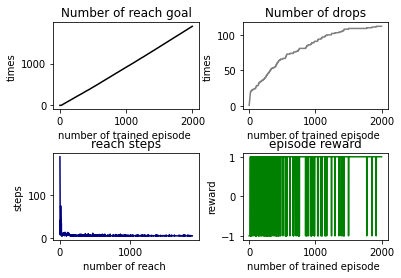

In [19]:
""" run Monte Carlo in different environment """

# choose differnt environment
DECAY_E = True
VALID_A = False
SLIDE = False

# hyparameter setting
EPISODE_NUM = 2000
E_END_DECAY = 1500
GRID_NUM = 4
END_E = 0.01
START_E = 0.1
SDANDARD_E = 0.1
SLIDE_P = 0.1
GAMMA = 0.9


def greedy_action(env, a, epsilon=SDANDARD_E):
    """
    ϵ greedy action selection,With a probability of 1-epsilon to choose best action
    With a probability of epsilon to random choose action 
    """
    if np.random.uniform() < epsilon:
        return np.random.choice(env.n_actions)
    else:
        return a


def get_key(dict, value):
    """Find the key corresponding to the value in the dictionary"""
    return [k for k, v in dict.items() if v == value]


def linear_anneal(current_episode, start=START_E, stop=END_E, steps=E_END_DECAY):
    """from start decay to end with current_episode increase ,unchange after steps"""
    if current_episode <= steps:
        eps = stop + (start - stop) * (1 - current_episode / steps)
    else:
        eps = stop
    return eps


def calculate_g(data_list):
    """
    use G=reward+gamma*G(next state) to calculate G
    Careful: data list needs to be reversed for correct calculation of G
    Args: data_list: List of state,action,reward of an episode.
    Gamma: discount factor for future step
    Return: List of all states with state,action,G for each state visited.
    """
    G = 0
    G_list = []
    for s, a, r in reversed(data_list):
        # reverse list in order to calculate G from end to start use g(t) = r(t+1) + gamma*G(t+1)
        G = r + GAMMA * G
        G_list.append([s, a, G])
    return reversed(G_list)


def validaction(s, GRID_NUM):
    """get the actions that can be performed in input state"""
    if GRID_NUM == 4:
        if s == 5 or s == 6 or s == 9 or s == 10:
            valid_a = [0, 1, 2, 3]
        elif s == 0:
            valid_a  = [1, 2]
        elif s == 4 or s == 8:
            valid_a  = [1, 2, 3]
        elif s == 12:
            valid_a  = [1, 3]
        elif s == 1 or s == 2:
            valid_a  = [0, 1, 2]
        elif s == 13 or s == 14:
            valid_a  = [0, 1, 3]
        elif s == 3:
            valid_a  = [0, 2]
        elif s == 15:
            valid_a  = [0, 3]
        elif s == 7 or s == 11:
            valid_a  = [0, 2, 3]
    if GRID_NUM == 10:
        if s == 0:
            valid_a  = [1, 2]
        elif s in range(1, 9):
            valid_a  = [0, 1, 2]
        elif s == 9:
            valid_a  = [0, 2]
        elif s % 10 == 0 and s != 0 and s != 90:
            valid_a  = [1, 2, 3]
        elif s % 10 == 9 and s != 9 and s != 99:
            valid_a  = [0, 2, 3]
        elif s == 90:
            valid_a  = [1, 3]
        elif s == 99:
            valid_a  = [0, 3]
        else:
            valid_a  = [0, 1, 2, 3]
    return valid_a 


class MonteCarlo(object):
    """
        monte_carlo is a model free reinforcement learning method
        """

    def __init__(self, env):
        """initialize algorithm"""
        self.env = env
        # create a random policy
        self.policy = {j: np.random.choice(self.env.n_actions) for j in range(self.env.n_observation)}
        # initialize all Q to zero
        self.Q = {j: {i: 0 for i in range(self.env.n_actions)} for j in range(self.env.n_observation)}
        # Initialize return as an empty list
        self.returns = {(s, a): [] for s, a in product(range(self.env.n_observation), range(self.env.n_actions))}
        # record performance to compare
        self.record_r = []
        self.record_s = []
        self.record_reach = []
        self.record_f = []
        self.reach_goal = 0
        self.fall = 0

    def train(self):
        """ run many episodes collect they data ,
        update Q and policy after every episode end to find the optimal policy"""
        self.env.render()
        # ϵ decay
        if DECAY_E == True:
            self.epsilon = START_E
        else:
            self.epsilon = SDANDARD_E
        for i in range(EPISODE_NUM):
            # each episode set seen_state_action_pairs to empty
            seen_state_action_pairs = set()
            # run an episode and collect data then caculate G
            G_list = calculate_g(self.collect_data())
            # Use s,a,G to update Q
            for s, a, G in G_list:
                pair = (s, a)
                if pair not in seen_state_action_pairs:
                    # if pair not in set mean it is first visit,just the first pair will be record
                    self.returns[pair].append(G)
                    self.Q[s][a] = np.mean(self.returns[pair])
                    seen_state_action_pairs.add(pair)
            for s in self.policy.keys():
                if VALID_A:
                    # only use valid action
                    action_Q_set = []
                    valid_action = validaction(s, GRID_NUM)
                    for i in range(len(valid_action)):
                        index_a = valid_action[i]
                        action_Q_set.append(self.Q[s][index_a])
                    max_action = max(action_Q_set)
                    # some actions may have the same max Q value, so randomly choose on in these actions
                    self.policy[s] = np.random.choice(get_key(self.Q[s], max_action))
                else:
                    self.policy[s] = max(self.Q[s], key=self.Q[s].get)
            if i % 1000 == 0:
                print('episode', i)
        # give each episode's performance
        reach_goal_p = (self.reach_goal / EPISODE_NUM) * 100
        fall_p = (self.fall / EPISODE_NUM) * 100
        print('reach goal probility is', reach_goal_p)
        print('fall probility is', fall_p)

        return self.record_reach, self.record_f, self.record_s, self.record_r, self.policy, self.Q

    def collect_data(self):
        """
        collect data of an episode using monte carlo with greedy action choose.
        Args: env: frozen lake enviroment
        policy:  first visit monte carlo with greedy action choose
        Return: List of all states with state,action,reward for each state visited.
        """
        done = False
        episode_data = []
        state = self.env.reset()
        all_reward = 0
        step = 0
        while not done:
            # collect data until episode end
            step += 1
            action = greedy_action(self.env, self.policy[state], epsilon=self.epsilon)
            next_state, reward, done = self.env.step(action)
            all_reward += reward
            episode_data.append([state, action, reward])
            state = next_state
            if done:
                # recode performance
                if reward == 1:
                    self.reach_goal += 1
                    if DECAY_E == True:
                        # decay ϵ with the number of reach goal episode increase
                        self.epsilon = linear_anneal(self.reach_goal, start=START_E, stop=END_E, steps=E_END_DECAY)
                    self.record_s.append(step)
                    print('episode end at', step)
                if reward == -1:
                    self.fall += 1
        self.record_r.append(all_reward)
        self.record_reach.append(self.reach_goal)
        self.record_f.append(self.fall)
        return episode_data

    def test_policy(self, final=False):
        """use to test if policy can reach the goal """
        state = self.env.reset()
        done = False
        while not done:
            next_state, reward, done = self.env.step(self.policy[state])
            self.env.render()
            if final:
                time.sleep(1)
            state = next_state



if GRID_NUM == 4:
    env = frozenlake('4*4', slide=SLIDE, slide_p=SLIDE_P)
if GRID_NUM == 10:
    env = frozenlake('10*10', slide=SLIDE, slide_p=SLIDE_P)
train_method = MonteCarlo(env)
start = time.time()
record_reach, record_f, record_s, record_r, policy, Q_table = train_method.train()
end = time.time()
train_time = end - start
print('train over,training time is', train_time)
print(Q_table)

# plot figures
fig = plt.figure()
plt.subplots_adjust(wspace =0.3, hspace =0.5)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(range(EPISODE_NUM), record_reach, color='black')
ax1.set_title('Number of reach goal')
ax1.set_xlabel('number of trained episode ')
ax1.set_ylabel('times')

ax2.plot(range(EPISODE_NUM), record_f, color='gray')
ax2.set_title('Number of drops')
ax2.set_xlabel('number of trained episode ')
ax2.set_ylabel('times')

ax3.plot(range(len(record_s)), record_s, color='navy')
ax3.set_title('reach steps')
ax3.set_xlabel('number of reach ')
ax3.set_ylabel('steps')

ax4.plot(range(EPISODE_NUM), record_r, color='g')
ax4.set_title('episode reward')
ax4.set_xlabel('number of trained episode ')
ax4.set_ylabel('reward')

print('plot over')
plt.show()

train_method.test_policy(final=True)